<a href="https://colab.research.google.com/github/E1250/cnn_cv_gans-ref/blob/main/dc_image_processing_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing in Python

## Intro to Image Processing with Scikit-Image
we use image processing to `Enhance` and image or `Extract Useful Information` to make decision

**Image** is an array or a matrix of pixels

* Read More about RGB & GrayScale image - https://towardsdatascience.com/exploring-the-mnist-digits-dataset-7ff62631766a

**RGB** images have three color channels, while **GrayScaled** images ones have a single channel.

In [ ]:
# !pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 28.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.
librosa 0.10.0.post2 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.


In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [ ]:
!pip install pyhull

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.8/318.8 kB 8.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyhull: filename=pyhull-2015.2.1-cp310-cp310-linux_x86_64.whl size=192223 sha256=126f99db21f6cff3e6b75557bb53839d1542321209bf2fe9f9f617cac0c18571
  Stored in directory: /root/.cache/pip/wheels/1d/fd/7a/6ead61cb02ac9917e202f01599afaab1140810a9d471849e9b
Successfully built pyhull


In [ ]:
from skimage import data
from skimage import color

# Loading rocket image
rocket_image = data.rocket()

# Priting the shape of an image
print("Rocket Image Shape : ",rocket_image.shape)

# Priting the size of an image
print("Rocket Image Size : ",rocket_image.size)

Rocket Image Shape :  (427, 640, 3)
Rocket Image Size :  819840


In [ ]:
import matplotlib.pyplot as plt

def show_image(image , title = "Image" , cmap_type = "gray"):
    plt.imshow(image , cmap = cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# Convering from RGB to GrayScale
grayscale = color.rgb2gray(rocket_image)

# Showing images
show_image(grayscale ,"GrayScale Image")


In [ ]:
# Convering from GrayScal to RGB 
rgb = color.gray2rgb(grayscale)

# Showing images
show_image(rgb ,"RGB Image")

## Numpy for images
You can use numpy to `Flip` or `Extract Features` of an image.

You need to convert an image to `ND Array` to plot it using `Matplotlib`

In [ ]:
import numpy as np

In [ ]:
# Obtaining the Colors of RGB usign numpy
fig , ax = plt.subplots(1,3)

# Red Color
red = rocket_image[ : , : , 0]
ax[0].imshow(red)
ax[0].axis(False)

# Green Color
green = rocket_image[ : , : , 1]
ax[1].imshow(green)
ax[1].axis(False)

# Blue Color
blue = rocket_image[ : , : , 2]
ax[2].imshow(blue)
ax[2].axis(False);

In [ ]:
# Flibbing the image Vertically
vertically_flipped = np.flipud(rocket_image) # up-down

show_image(vertically_flipped , "Vertically Flipped Image")

In [ ]:
# Flibbing the image Vertically
horizontally_flipped = np.fliplr(rocket_image) # left-right

show_image(horizontally_flipped , "Horizontally Flipped Image")

> You can use histogram to discribe images to make: **Analysis**, **Thresholding** etc.
from plotting `ravel`, you can know if your image is black or white, dark or not and so on.

In [ ]:
plt.hist(red.ravel() , bins = 256 , color = "red");
plt.title("Red Histogram")

### Thresholding
segment an image into two regions, foreground and background. This is done by assigning a new value to each pixel in the image based on whether its intensity is above or below a certain threshold value.

Thresholding is a simple but powerful technique that can be used for a variety of tasks, such as:

* Detecting edges in an image
* Isolating objects in an image for object detection of face detection etc. works best at high contrast GrayScale images
* Removing noise from an image
* Enhancing contrast in an image

return: 255(White) If pixel > threshold, 0(Black) pixel < threshold  

**Categories :**
* **Global or histogram based**: good for uniform backgrounds
* **Local or adaptive**: for uneven background illumination

In [ ]:
# Load new image
from skimage import data
import matplotlib.pyplot as plt

image= data.horse()

In [ ]:
# Obtain the optimal threshold value
thresh = 127

# Apply thresholding to the image
binary = rocket_image > thresh
binary.astype("int")
# Show the original and thresholded
show_image(binary,"Thresholded")

In [ ]:
# this is not the only way for thresholding, it is just the one worked for me
from skimage.filters import try_all_threshold

# Applying the function
fig , ax = try_all_threshold(image,verbose = False)

# Showing result using plot

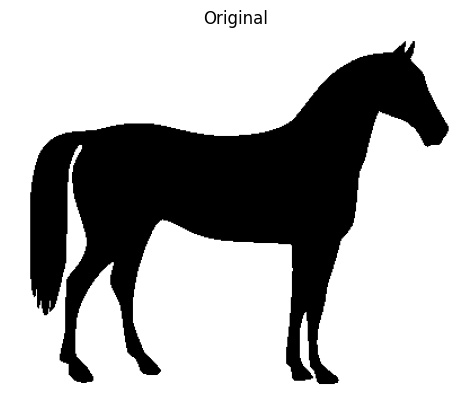

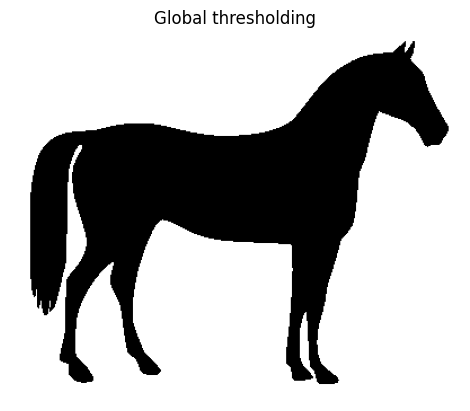

In [ ]:
# Import the orsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal theshold value
thresh = threshold_otsu(image)

# Applying the thresh to the image
binary_global = image > thresh

# Plotting the image
show_image(image , "Original")
show_image(binary_global , "Global thresholding")

In [ ]:
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(image , block_size , offset = 10)

# Apply the local thersh
binary_local = image > local_thresh

# Plotting the images
show_image(image , "Original")
show_image(binary_local , "Local Thresholding")

## Applying Filters and transformation etc.
**Fitering** is a technick to enhance an image, used for `Edge Detection`, `Remove Features` or `Smoothing` 
* Read More - https://medium.com/@ganchimeg10/how-does-image-filtering-work-e3ea5eb5b40

In [ ]:
from skimage import data
import matplotlib.pyplot as plt

image_coins = data.coins()

In [ ]:
def plot_comparison(original,filtered , title_filtered):
    fig , ax = plt.subplots(1,2 , figsize = (8,6) , sharey = True , sharex = True)

    ax[0].imshow(original , cmap = "gray")
    ax[0].axis(False)
    ax[0].set_title("Original")

    ax[1].imshow(filtered, cmap = "gray")
    ax[1].axis(False)
    ax[1].set_title(title_filtered);

### Sobel

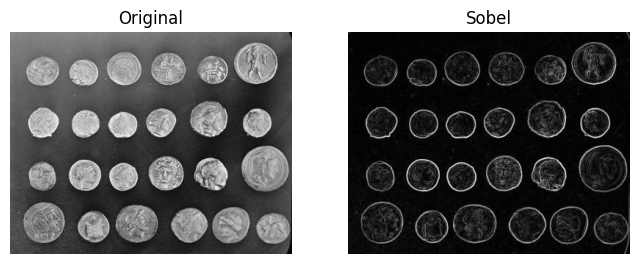

In [ ]:
# Import module and functions
from skimage.filters import sobel

# Apply edge detection filter
edge_sobel = sobel(image_coins)

# Comparing the images
plot_comparison(image_coins,edge_sobel,"Sobel")

### Gaussian

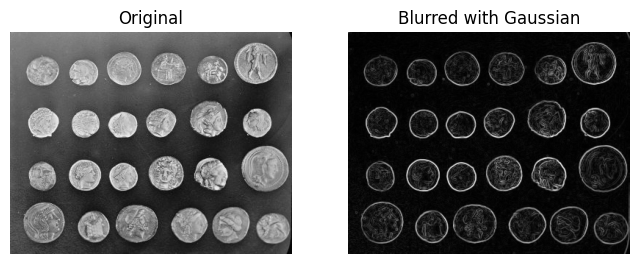

In [ ]:
# Import the module
from skimage.filters import gaussian

# Apply edge detection filter
gaussian_image = gaussian(image_coins,channel_axis=3)

# Comparing the images
plot_comparison(image_coins,edge_sobel,"Blurred with Gaussian")

### Equalization

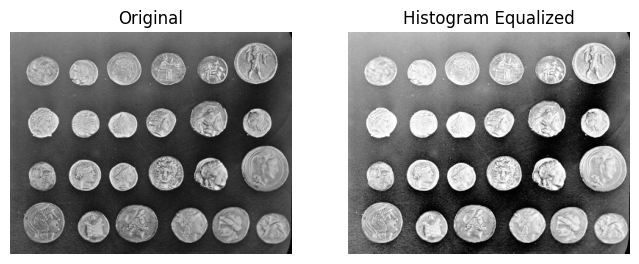

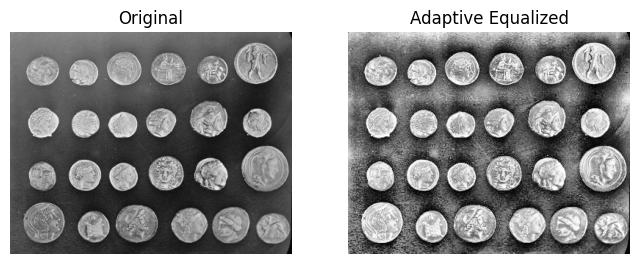

In [ ]:
from skimage import exposure

# Obtain the equalized image
image_eq = exposure.equalize_hist(image_coins)
image_adaptev = exposure.equalize_adapthist(image_coins,clip_limit=0.03)


# Show Original and Equalized Image
plot_comparison(image_coins,image_eq,"Histogram Equalized")
plot_comparison(image_coins,image_adaptev,"Adaptive Equalized")

### Rotating

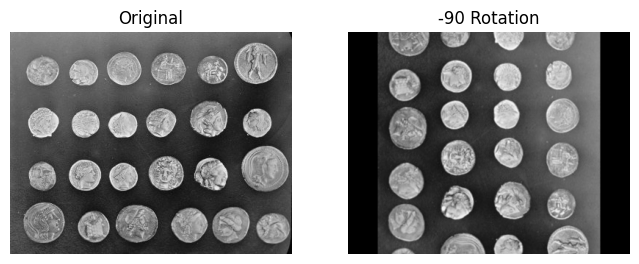

In [ ]:
from skimage.transform import rotate

# Rotate the image 90 degree
image_rotated = rotate(image_coins , -90)

plot_comparison(image_coins,image_rotated,"-90 Rotation")

### Rescaling & Resizing
Read more about Aliasing images - https://www.selecthub.com/resources/what-is-anti-aliasing/
> you can resize the image depending on adaptive ration like `.25` by devide the heigh and width by 0.25

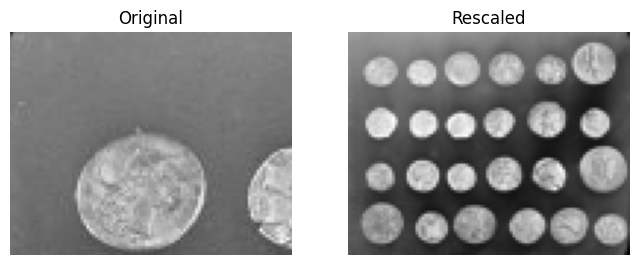

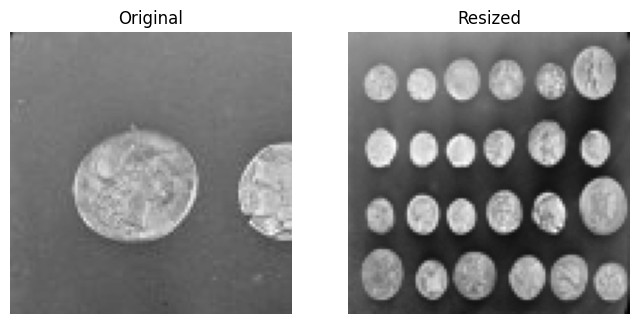

In [ ]:
from skimage.transform import rescale
from skimage.transform import resize


# Rescale the image
image_rescaled = rescale(image_coins , 0.25 , anti_aliasing = True)
image_resized = resize(image_coins , (100,100) , anti_aliasing = True)  # (height , width)


# Plotting
plot_comparison(image_coins,image_rescaled,"Rescaled")
plot_comparison(image_coins,image_resized,"Resized")

### Morphology (Not Working)
* Dilation
* Erosion

**Read more** - https://scikit-image.org/docs/stable/api/skimage.morphology.html

In [ ]:
# !pip install -U scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 40.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.
librosa 0.10.0.post2 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.


In [ ]:
# !pip install -U scikit-learn

In [ ]:
# from skimage import morphology

# square - morphology.square(4)
# rectangle = morphology.recatngle(4,2)

# Obtain the erosed image with binary erosion
# eroded_image = morphology.binary_erosion(image_coins,selem = square)
# dilated_image = morphology.binary_dilation(image_coins)

# Plotting the images
# plot_comparison(image_coins,eroded_image,"Erosion")
# plot_comparison(image_coins,dilated_image,"Dilation")

### Image Restoring (Inpainting)
image restoring is a technique use to restore damaged images and fixes them, it is also used to remove objects from the image
![image.png](attachment:f5f0450c-2e34-4679-8243-650da872a840.png)

In [ ]:
from skimage import data

# Loading rocket image
astronaut_image = data.astronaut()

# This image is not defected but just for testing we will use this image
image = astronaut_image

In [ ]:
def plot_comparison(original,filtered , title_filtered):
    fig , ax = plt.subplots(1,2 , figsize = (8,6) , sharey = True , sharex = True)

    ax[0].imshow(original , cmap = "gray")
    ax[0].axis(False)
    ax[0].set_title("Original")

    ax[1].imshow(filtered, cmap = "gray")
    ax[1].axis(False)
    ax[1].set_title(title_filtered);

In [ ]:
from skimage.restoration import inpaint

# Creating the mask
# mask = get_mask(image)

# Apply inpaintation to the damaged image using the mask
# restored_image = inapint.inpaint_biharmonic(image,mask,multichannel= True)

# Plotting the image
# plot_comparison(image , restored_image,"Restored")


### Noise
**Denoising Types**
* Total Vatiation (TV)
* Bilateral
* Wavelet denoising
* Non-local means denoising

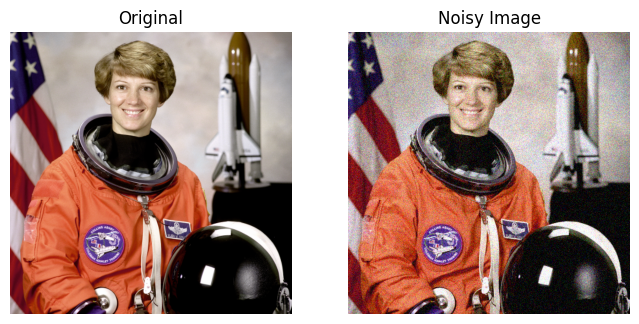

In [ ]:
# Adding noise
from skimage.util import random_noise

# Add noise
noisy_image = random_noise(image)

# Plotting
plot_comparison(image,noisy_image,"Noisy Image")

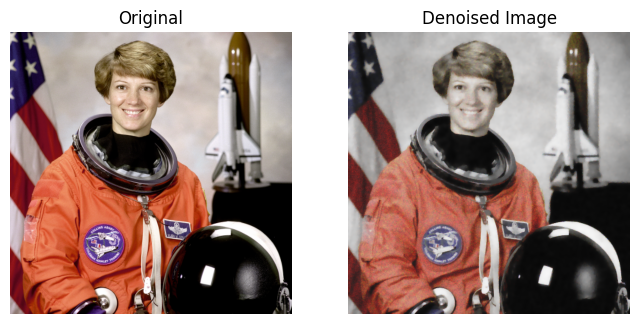

In [ ]:
# Removing Noise Using Total Variation Filter
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image , weight = 0.1)

# Plotting
plot_comparison(image,denoised_image,"Denoised Image")

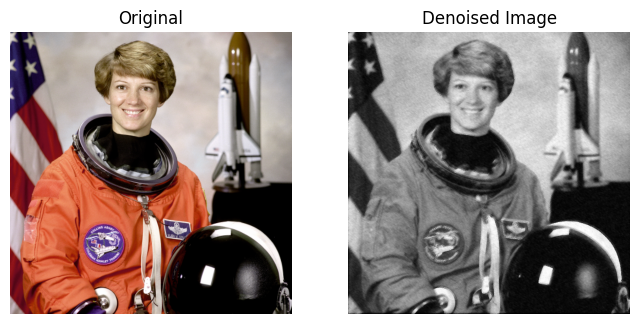

In [ ]:
# Removing Noise Using Bilateral Filter
from skimage.restoration import denoise_bilateral
from skimage import color

# Apply total variation filter denoising
denoised_image = denoise_bilateral(color.rgb2gray(noisy_image))

# Plotting
plot_comparison(image,denoised_image,"Denoised Image")

### Image Segmenation
* Supervised
* Unsupervised
- * Simple Linear Iterative Clustering (SLIC)
![image.png](attachment:a492595e-aba6-4335-b9d1-f2d97988a8ad.png)

In [ ]:
# TODO i am getting an error here also
# Simple Linear Iterative Clustering (SLIC)
# from skimage.segmentation import slic
# from skimage.color import label2rgb

# Obtain the segmenta
# segmants = slic(image , n_segments = 200 )  # Returns labels

# Put segments on the top of original image to compare
# segmented_image = label2rgb(segmants,image,kind='avg')

# Plotting
# plot_comparison(image,segmented_image,"Segmented Image")

### Finding Contours
1. Transfer the image to 2D GrayScale
2. Binarize the image
3. Finding Contours

![image.png](attachment:5e5ca174-4b2a-4458-b869-12b2dd6a679c.png)

In [ ]:
from skimage import color

In [ ]:
from skimage.filters import threshold_otsu
from skimage import measure

# Make the image GrayScale
image = color.rgb2gray(image)

# Binarizing the image
# Obtain the thresh value
thresh = threshold_otsu(image)
# Applying thresholding
thresholded_image = image > thresh

# Finding Contours
# Import the measure module
# Find the contours at a constant value of `0.8`
contours = measure.find_contours(thresholded_image , 0.8)

# Plotting
# plot_comparison(image,contours,"Denoised Image")

## Detection

### Edge Detection
* Canny

In [ ]:
from skimage import color
from skimage import data

image = data.coins()

In [ ]:
# Canny Edge Detection
# from skimage.feature import canny

# Convet image to GrayScale
# coins = color.rgb2grau(image)

# Applying canny
# canny_edges = canny(coins)
# canny_edges_sigma = canny(coins,sigma = 0.5)

# Plotting results
# plot_comparison(image,canny_edges,"Edges using Canny")
# plot_comparison(image,canny_edges_sigma,"Edges using Canny Sigma")

### Corner Detection
Corner detection is a technique used in computer vision to identify corners in images. Corners are points in an image where there is a significant change in the image gradient, such as where two edges meet. Corner detection is used in a variety of applications
* Harris Corner Detector

In [ ]:
import matplotlib.pyplot as plt

def show_image_with_corners(image,coords , title = "Corners Detected"):
    plt.imshow(image , interpolation = 'nearest' , cmap = 'gray')
    plt.title(title)
    plt.plot(coords[:,1] , coords[:,0] + '+r' , markersize = 15)
    plt.axis(False)
    plt.show()

In [ ]:
# from skimage.feature import corner_harris , corner_peaks

# Convert image to Gray Scale
# image = rgb2gray(image)

# Apply the Harris corner detector on the image
# measure_image = corner_harris(image)
# coords = corner_peaks(corner_harris(image) , min_distance = 5)

# Show the Harris resopnse image
# plot_comparison(image,measure_image,"Harris Image")
# print(f"{len(coords)} Corners were detected.")

### Face Detection

In [ ]:
# Import the classifier class
# from skimage.feature import Cascade

# Load the trained file.
# trained_file = data.lbp_frontal_face_cascase_filename()

# Init the Detector cascade.
# detector = Cascase(trained_file)

In [ ]:
import matplotlib.pyplot as plt

def show_detected_face(result , detected , title = "Face Image"):
    plt.imshw(result)
    img_desc = plt.gca()
    plt.set_map('gray')
    plt.title(tilte)
    plt.axis(False)
    
    for patch in detected :
        img_desc.add_patch(
            patches.Rectangle(
            (patch['c'] , patch['r']),
                patch['width'],
                patch['height'],
                fill = False,
                color = 'r',
                linewidth = 2                
            )
        )
        
    plt.show()
    

In [ ]:
# Apply detector on the image
detected = detector.detect_multi_scale(img = image , scale_factor = 1.2 , step_ratio = 1 , min_size = (10,10) , max_size = (200,200))

print(f"Detected Faces {detected}")

# Show image with detected face marked
show_detected_face(image,detected)

### Privacy Protection Application
we want to detect people face then blurring it

In [ ]:
def get_face(d):
    """
    Extract the face fectangle from the image using the coordinates of the detected.
    """
    # X and Y Starting points of the face rectangle
    x,y = d['r'] , d['c']
    
    # Adding the width and the height of the rectangle
    width, height = d['r'] + d['width'] , d['c'] + d['height']
    
    # Extract the detected face
    face = image[x:width,y:height]
    
    return face    

In [ ]:
def mergeBlurryFace(original , gaussian_image):
    # X and Y Starting points of the face
    x,y = d['r'] , d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'] , d['c'] + d['height']
    
    original[x:width ,y:height] = gaussian_image
    
    return original

In [ ]:
# Import Cascade of classification and gaussian filter
from skimage.feature import Cascade
from skimage.filters import gaussian

# Detect faces
detected = detector.detect_multi_scale(img = image ,
                                    scale_factor = 1.2,
                                      step_ratio = 1 ,
                                      min_size = (50,50),
                                      max_size = (100,100))

# For each detected face
for d in detected:
    # Obtain the face cropped from detected coordinates
    face = getFace(d)
    
    # Applying gaussian filter to blur the image
    gaussian_face = gaussian(face , multichannel = True , sigma = 10)
    
    # Merge this blurry face to the final image and plot it
    resulting_image = mergeBlurryFace(image , gaussian_face)

# Biomedical Image Analysis

## Exploration
* Loading images
* N-D Data
* Subplots

**Loading images** you use `imageio` to read and save images and this library is reallly good for reading `dcm` files the standered format for **_Human Medical Images_**

**Image Metadata** : contains some information about the image
> you can use `imageio.volread()` to read multi-dimensional data directly.

you also have to learn how to madify the aspect ration of an image
* Read More : https://www.holisticseo.digital/python-seo/resize-image/
* Read More : https://www.geeksforgeeks.org/how-to-change-imshow-aspect-ratio-in-matplotlib/

## Masks and Filters
### Intensity
* **Pixels** are 2D pictures
* **Voxels** are 3D volume
* we use `Histogram` to count number of pixels at each intensity value.
* `Equalization` redustrubute values to oprimize full intensity range.
  * **Cumulative distriibution function : (CDF)** shows proportion of pixels in range.

### Masks
### Filters
* Smoothing
* Sharpening

you can combine horizontal and vertical edge data by calculating distance : $z=\sqrt{x^2 + y^2}$ 

## Measurment
### Objects and lables
**Bouding Box** range of pixels that completly encloses an object

### Measuring Morphology
**Spacial Extent** is the product of:
1. space occupied by each element
2. Number of array elements

### Measuring in time
**Ejection Fraction** = $\dfrac{LV_max - LV_min}{LV_max}$
1. Segment left ventricle
2. Calculate volume for each 3D volume in the time series
3. Select min and max
4. Calculate ejection fraction











In [ ]:
import imageio

# Reading images using imageio
im = imageio.imread("filenname.dcm")
type(im)

# Printing image Metadata
print("Image Metadata Keys : ",im.meta.keys())
print("Image Metadata : ",im.meta)

In [ ]:
# Stacking images
import imageio
import numpy as np

im1 = imageio.imread("img1.dcm")
im2 = imageio.imread("img2.dcm")
im3 = imageio.imread("img3.dcm")
print("Original Images shape : ", im1.shape())


stacked = np.stack([im1,im2,im3])
print("Stacked Images shape : ", stacked.shape())

vol = imageio.volread("chest-data") # chest-data is a Folder(Directory) name


In [ ]:
# Data types and Image size
import imageio
import numpy as np
im = imageio.imread("image.jpg")

# uint8
im.dtype('uint8')
print("The image size of 'uint8' is ",im.size)

# int_64
im_int64 = im.astype(np.uint64)
print("The image size of 'uint64' is ",im_int64.size)

In [ ]:
import scipy.ndimage as ndi
hist = ndi.histogram(im , min = 0 , max = 255 , bins = 256)

# Equalization
cdf = hist.cusum() / hist.sum()
im_equalized = cdf[im] * 255

fig , axes = plt.subplots(2,1)
axes[0].imshow(im)
axes[1].imshow(im_equalized)
plt.show()

In [ ]:
# Creating masks
import numpy as np
im_bone = np.where(im > 64 ,im, 0)

# Plotting maked images
plt.imshow(im_bone,cmap = 'gray')
plt.axis(False)
plt.show()

# Tuning masks
ndi.binary_dilation(m , iterations= 5)
ndi.binary_erosion(m , iterations= 5) # this is another kind

In [ ]:
# Filtering
import imageio
import scipy.ndimage as ndi
import scipy.ndimage.filters

im = imageio.imread("xray.jpg")

# Image Convolution
weights = [[.11,.11,.11].
           [.11,.11,.11],
           [.11,.11,.11]]
im_flit = ndi.convolve(im,weights)

# Plotting
fig , axes = plt.subplots(2,1)
axes[0].imshow(im,cmap='gray')
axes[1].imshow(im_flit,cmap='gray')
plt.imshow()

# Applying filters
ndi.median_filter(im,size = 10)
ndi.gaussian_filter(im , sigma = 5) # Used for bluring
ndi.sobel(im,axis = 0) # 0 : Horizontally , 1 : Vertically

In [ ]:
# Feature Detection
im = imageio.imread("image.jpg")
weights = [[+1,+1,+1], # Horizontally
           [0,0,0],
           [-1,-1,-1]]
           
edges = ndi.convolve(im,weights)
plt.imshow(edges , cmap = 'seimic') 

In [ ]:
# Sobel filter Magnitude
edges0 = ndi.sobel(im,axis = 0)
edges1 = ndi.sobel(im,axis = 1)

edges = np.sqrt(np.square(edges0) + np.square(edges1))

# Plotting
plt.show(edges , cmap = 'gray')

In [ ]:
# Labeling image component
import scipy.ndimage as ndi
im = imageio.imread("iamge.dcm")

filt = ndi.gaussian_filter(im,sigma = 2)

mask = filt > 150

labels , nlabels = ndi.label(mask)
print(f"There is {labels} distinct object")

boxes = ndi.find_objects(labels) # Creating tuple of index ranges to create box around the object

# Plotting labels
plt.imshow(labels , cmap = 'rainbow')
plt.axis(False)
plt.show()

# Label Selecting
np.where(lables == 1 , im, 0)

In [ ]:
# Calling measurement functions
import imageio
import scipy.ndimage as ndi

vol = imageio.volread('image.npz')
label = imageio.volread('labels.npz')

# All pixels
ndi.mean(vol)

# Labeled pixels
ndi.mean(vol , label)

# Label 1
ndi.mean(vol , label , index = 1)
ndi.mean(vol , label , index = [1,2])

# Object histograms
hist = ndi.histogram(vol , min = 0 , max = 255 , bins = 256)
odj_hists = ndi.histogram(vol , 0 ,255 , 256 , labels , index = [1,2])
plt.plot(odj_hists[0] , label = 'Left Ventricle')
plt.plot(odj_hists[1] , label = 'Other labeled pixels')
plt.legend()
plt.show()

In [ ]:
# Spatail Extent
# Calculate volume per voxel
d0, d1, d2 = vol.meta['sampling']
dvoxel = d0 * d1 * d2

# Count label voxels
nvoxels = ndi.sum(1,label , index = 1)

# Calculate volume of label
volume = nvoxels * dvoxel
print("Volume : ",volume)

In [ ]:
# Distance transformation
# Create a left ventricle mask
mask = np.where(labels == 1,1,0)

# In terms of voxels
d = ndi.distance_transform_edt(mask)
print("Max d In terms voxels",d.max())

# In terms of space 
d = ndi.distance_transform_edt(mask , sampling = vol.meta['sampling'])
print("Max d In terms of space",d.max())

In [ ]:
# Center of mass
com = ndi.center_of_mass(vol,labels,index = 1)
print("Cneter of Mass : ",com)

# Plotting
plt.imshow(vol[5] , cmap = 'gray')
plt.scatter(com[2],com[1])
plt.show()

In [ ]:
# Calcualte volume for each time point
# Stored in (t,z,x,y) format
print("Vol Shape",vol_ts.shape)
print("Labels Shape",labels.shape)

# Calculate voxel volume in mm^3
d0 ,d1,d2,d3 = vol_ts.meta['sampling']
dvoxel = d1 * d2 * d3

# Instantiate empty list
ts = np.zeros(20)

# Loop through volume time series
for t in range(20):
  nvoxels = ndi.sum(1 , labels[t] , index = 1)
  ts[t] = nvoxels * dvoxel
plt.plot(ts)
plt.show()

In [ ]:
# Calculate ejection fraction
min_vol = ts.min()
max_vol = ts.max()

ejec_frac = (max_vol - min_vol) / max_vol
print("Ejection Fraction : ",ejec_frac)

In [3]:
##**************************************More Studying is needed here to understand these advanced topics***********************************##

# Image Processing with keras

## Image Processing using Neural Network
* **Image Classification :** you give the pic to the model and the model predict the class using the **classifier**
* We represents classes using **OneHotEncoding**
  * SKLearn Webpage - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
  * Read More - https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

> We can use some data called `Validation Data` to make sure our model is not overfitting

In [ ]:
# Keras for image Classification
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(10 , activation = 'relu' , input_shape=(784,)))
model.add(Dense(10 , activation = 'relu'))
# The output is fully connected layer
model.add(Dense(10 , activation = 'softmax'))


model.compile(optimizer = 'adam' , loss = 'categorical_crossebtropy' , metrics = ['accuracy'])


# Fitting the model
# model.fit(train_data , train_labels , validation_split= .2 , epochs = 3)


# Validation data are used to avoid Overfitting
# model.evaluate(test_data , test_labels)

## Convolutions

* Youtube video (3Blue1Brown) - https://www.youtube.com/watch?v=KuXjwB4LzSA

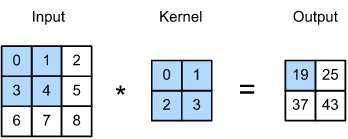

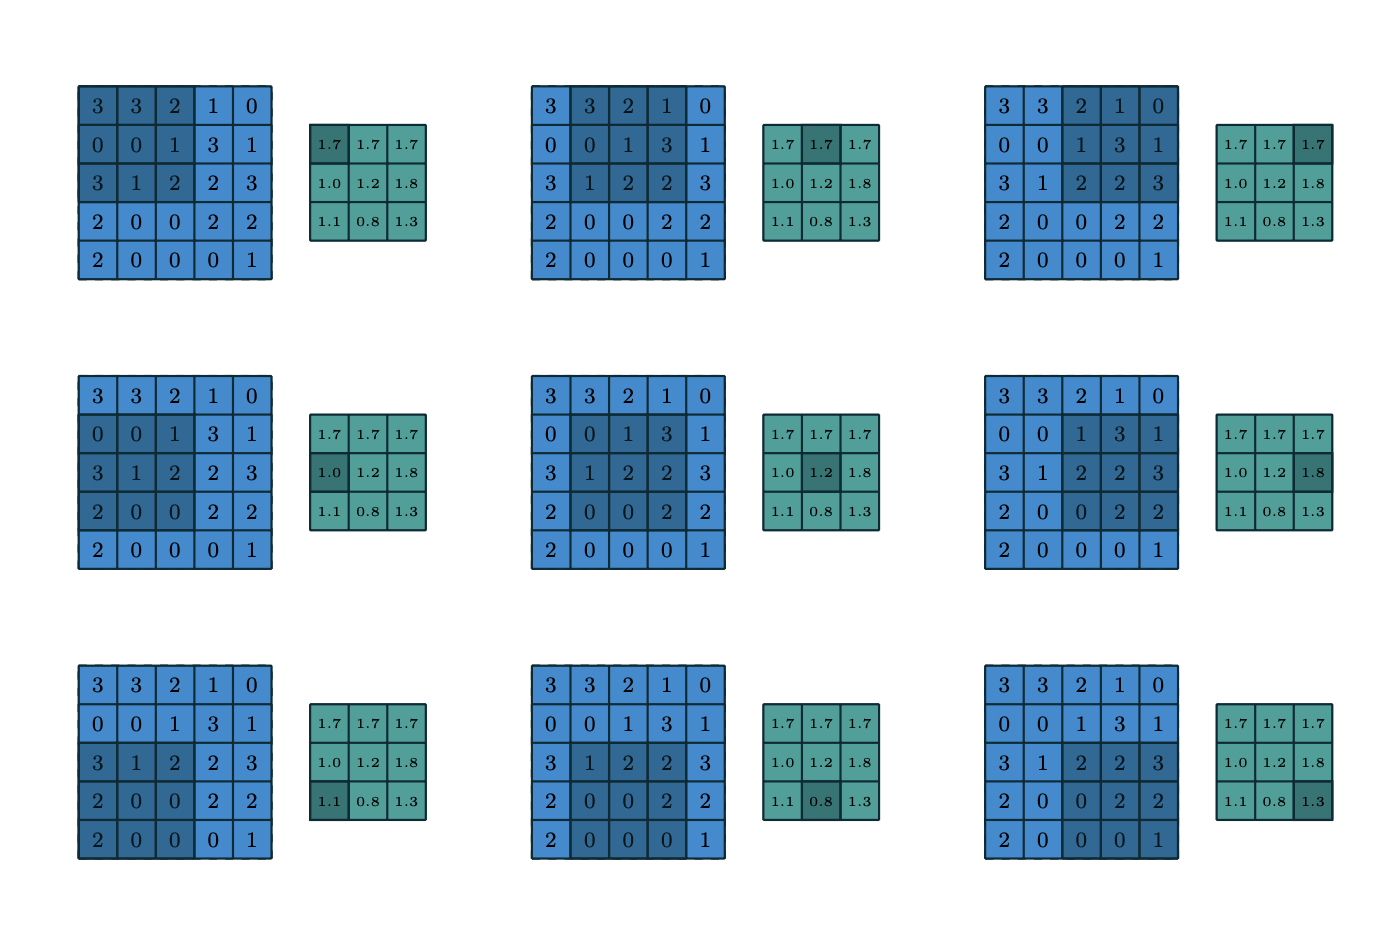

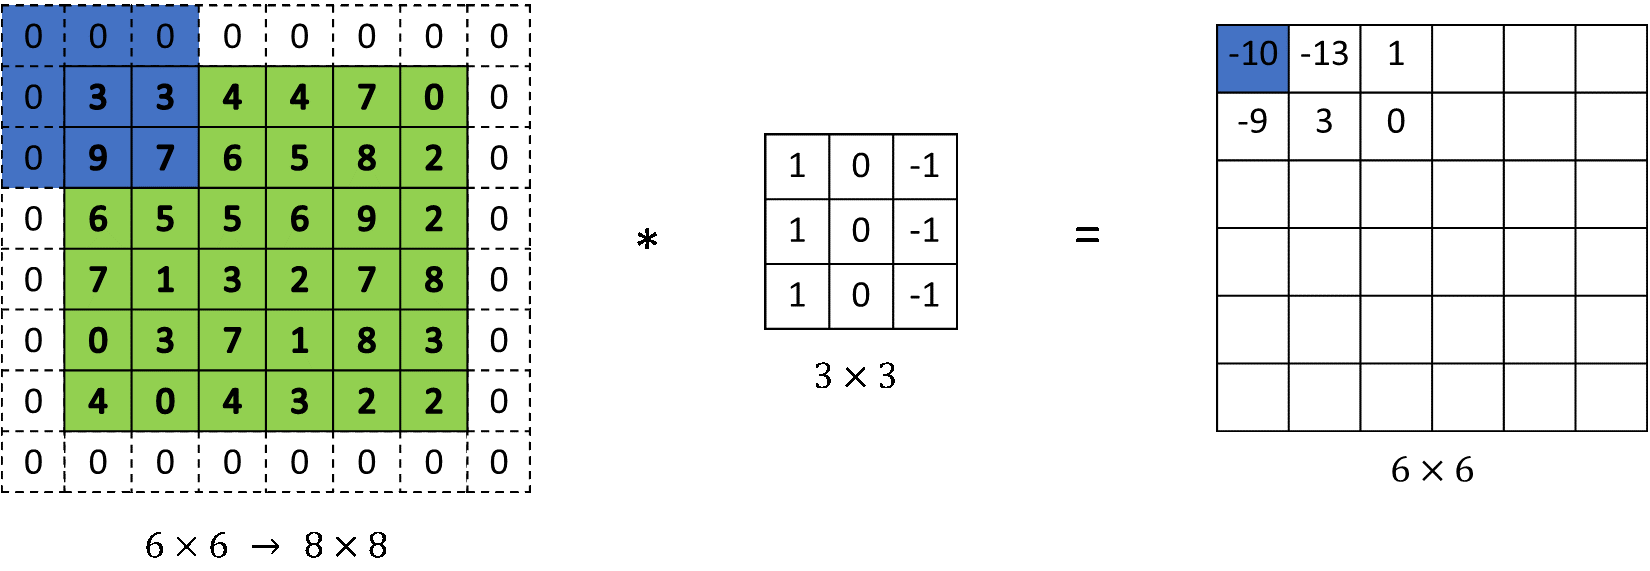

Dilated Convolutional
* Read More - https://www.geeksforgeeks.org/dilated-convolution/

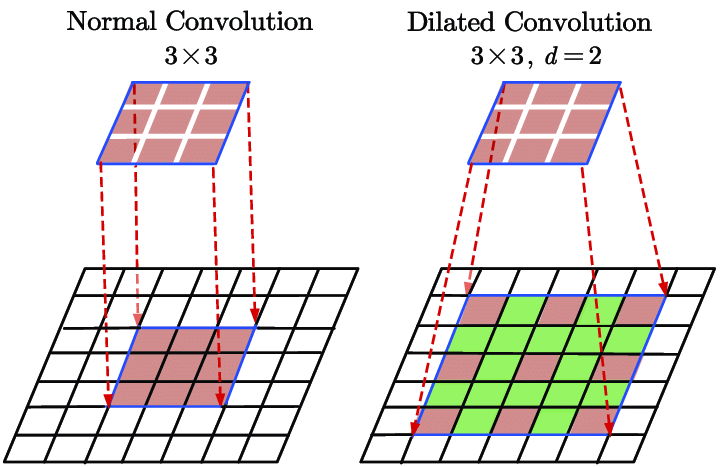

In [ ]:
# Convolution
import numpy as np

array = np.array([0,0,0,0,0,1,1,1,1,1])
kernal = np.array([-1,1])
conv = np.array([0,0,0,0,0,0,0,0,0,0])

for index in range(len(conv)):
  conv[index] = (kernal * array[index:index + 2]).sum()

for iindex in range(8):
  conv[iindex] = (kernal * array[iindex:iindex+2]).sum()
conv

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

* the following kernel finds a **vertical lines** in images:
```
np.array([
          [-1, 1, -1], 
          [-1, 1, -1], 
          [-1, 1, -1]
          ])
```
* A kernel that finds **horizontal lines** in images : 
```
kernel = np.array([
          [-1, -1, -1], 
          [1, 1, 1],
          [-1, -1 ,-1]
                  ])
```
* A kernel that finds a **light spot surrounded by dark pixels** :
```
kernel = np.array([
          [-1, -1, -1],
          [-1, 1, -1],
          [-1, -1, -1]
                   ])
``` 
* A kernel that finds a **dark spot surrounded by bright pixels** :
```
kernel = np.array([
          [1, 1, 1],
          [1, -1, 1],
          [1, 1, 1]
                   ])
```

There is a great formula to Calculate the size of the Output : 
$ O = \dfrac{ I - K + 2P}{S} + 1 $
* **I** : size of the input
* **K** : size of the Kernel
* **P** : Size of Padding
* **S** : Strides

> The Major difference between a **deep CNN** and a **CNN** with only one convolutional layer - A deep network requires more data and more computation to fit.

**Pooling** is used to reduce number of parameters, and it is added after each `Conv2D` Layer

### Storing the optimal parameters
we want to store the best parameters that will be before overfitting.
* We also can use **Regularization** to solve **Overfitting**
* You can also use **Dropout**
* You can also use **Batch Normalization**

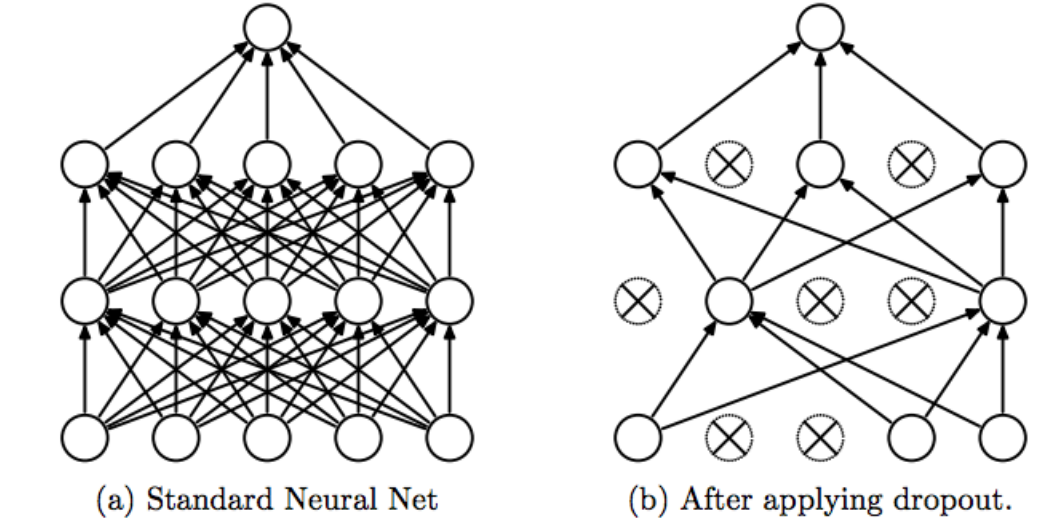

> Sometimes `Dropout` and `Batch Normalization` don't work well together

In [ ]:
# Keras Convolutional Layer 
from keras.layers import Conv2D,Dense,Flatten,MaxPool2D , Dropout, BatchNormalization
from keras.models import Sequential

train_data = []
test_data = []
test_labels = []

model = Sequential()
model.add(Conv2D(10 , kernel_size = 3 , activation = 'relu' , input_shape = (100 , 100 , 1))) # (img_rows , img_columns , 1)
model.add(Conv2D(10 , kernel_size = 3 , activation = 'relu' , input_shape = (100 , 100 , 1) , padding = 'valid')) # Adding Padding ( valid , same , equal )
model.add(Conv2D(10 , kernel_size = 3 , activation = 'relu' , input_shape = (100 , 100 , 1) , padding = 'valid') , strieds = 1) # Adding Srides (Steps) 
model.add(Conv2D(10 , kernel_size = 3 , activation = 'relu' , input_shape = (100 , 100 , 1) , padding = 'valid') , strides = 1 , dilation_rate = 2) # Adding Dilation
model.add(MaxPool2D(2)) # After each Conv layer
model.add(Dropout(0.25)) # After Layer you wanna use after.
model.add(BatchNormalization()) # After Layer you wanna use after.


model.add(Flatten()) # Connecting between Dense and Convolutional layers
model.add(Dense( 3 , activation = 'softmax'))

# Fitting 
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
# model.fit(train_data , train_labels , validation_split = 0.2 , epochs = 3)
# model.evalutate(test_data , test_labels)

# Summarizing 
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint

# this check point stores the model parameters in a file
checkpoint = ModelCheckpoint("weights.hdf5" , monitor = 'val_loss' , save_best_only=True)

# Storing it in a list 
callbacks_list = [checkpoint]

# Fit the model on a training set
# model.fit(train_data , train_labels m validation_split = 0.2 , epochs = 3 , callbacks = callbacks_list)

# Loading weights again (checkpoints)
# model.load_weights("weights.hdf5")
# model.predict_classes(test_data)

In [ ]:
# Print model layer
model.layers

# Print model layer weights
model.layers[0].get_weights()  # returnes   kernal, 